<a href="https://www.kaggle.com/code/theanjalirai/password-strength-classifier-logistic-regression?scriptVersionId=195632730" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Password Strength Classifier - Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import csv

def clean_csv(input_file, output_file):
    with open(input_file, 'r', newline='', encoding='utf-8') as infile, \
         open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        
        csvreader = csv.reader(infile)
        csvwriter = csv.writer(outfile)
        
        headers = next(csvreader)
        csvwriter.writerow(headers)
        
        for row in csvreader:
            if len(row) <= 2:
                csvwriter.writerow(row)

input_file = '/kaggle/input/password-strength-classifier/data.csv'
output_file = 'clean_data.csv'

clean_csv(input_file, output_file)

In [3]:
df = pd.read_csv("/kaggle/working/clean_data.csv")

In [4]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [6]:
df.duplicated().sum()

0

> no duplicates in the dataset

In [7]:
df['strength'].value_counts()

strength
1    496801
0     89702
2     83137
Name: count, dtype: int64

In [8]:
def extract_count_digits(s):
    s = str(s) if pd.notnull(s) else ""
    count = len([char for char in s if char.isdigit()])
    return count

def extract_count_lowercase(s):
    s = str(s) if pd.notnull(s) else ""
    count = len([char for char in s if char.islower()])
    return count

def extract_count_uppercase(s):
    s = str(s) if pd.notnull(s) else ""
    count = len([char for char in s if char.isupper()])
    return count

def extract_count_special(s):
    s = str(s) if pd.notnull(s) else ""
    count = len([char for char in s if not char.isalnum()])
    return count
def extract_length(s):
    s = str(s) if pd.notnull(s) else ""
    count = len([char for char in s])
    return count


In [9]:
df['length'] = df['password'].apply(extract_length)
df['digit_count'] = df['password'].apply(extract_count_digits)
df['lowercase_count'] = df['password'].apply(extract_count_lowercase)
df['uppercase_count'] = df['password'].apply(extract_count_uppercase)
df['special_count'] = df['password'].apply(extract_count_special)

Shannon Entropy Formula The Shannon entropy 𝐻 H of a password is calculated using the formula:

𝐻
− ∑ 𝑖 = 1 𝑛 𝑝 𝑖 log ⁡ 2 ( 𝑝 𝑖 ) H=−∑ i=1 n​p i​log 2​(p i​)

Where:

> 𝑛 n is the number of unique characters in the password. 𝑝 𝑖 p i​is the probability of character 𝑖 i appearing in the password. Steps to Calculate Entropy Determine the Frequency of Each Character: Count how many times each unique character appears in the password. Calculate the Probability of Each Character: Divide the frequency of each character by the total length of the password. Compute the Entropy: Apply the Shannon entropy formula using these probabilities.**********

In [10]:
df.head()

,password,strength,length,digit_count,lowercase_count,uppercase_count,special_count
0,kzde5577,1,8,4,4,0,0
1,kino3434,1,8,4,4,0,0
2,visi7k1yr,1,9,2,7,0,0
3,megzy123,1,8,3,5,0,0
4,lamborghin1,1,11,1,10,0,0


In [11]:
import math
def calculate_entropy(s):
    s = str(s) if pd.notnull(s) else ""
    prob = [float(s.count(c)) / len(s) for c in set(s)]
    entropy = - sum([p * math.log(p) / math.log(2.0) for p in prob])
    return entropy
df['entropy'] = df['password'].apply(calculate_entropy)

In [12]:
import re
def count_sequential_chars(s):
    s = str(s) if pd.notnull(s) else ""
    sequences = re.findall(r'(012|123|234|345|456|567|678|789|890|abc|4321|321|1234|asdf|bcd|cde|def|efg|fgh|ghi|hij|ijk|jkl|klm|lmn|mno|nop|opq|pqr|qrs|rst|stu|tuv|uvw|vwx|wxy|xyz|qwerty)', s.lower())
    return len(sequences)
df['sequential_chars'] = df['password'].apply(count_sequential_chars)


In [13]:
import pandas as pd
import nltk

nltk.download('words')
from nltk.corpus import words
english_words = set(words.words())

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    return words

def count_dictionary_words(text, dictionary):
    words = preprocess_text(text)
    dictionary_words = [word for word in words if word in dictionary]
    return len(dictionary_words)

df['dictionary_word_count'] = df['password'].apply(lambda x: count_dictionary_words(str(x), english_words))



[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [14]:
df.head()

,password,strength,length,digit_count,lowercase_count,uppercase_count,special_count,entropy,sequential_chars,dictionary_word_count
0,kzde5577,1,8,4,4,0,0,2.500000,0,0
1,kino3434,1,8,4,4,0,0,2.500000,0,1
2,visi7k1yr,1,9,2,7,0,0,2.947703,0,0
3,megzy123,1,8,3,5,0,0,3.000000,1,0
4,lamborghin1,1,11,1,10,0,0,3.459432,1,0


In [15]:
df1 = df.copy()
df1 = df1.drop('password', axis = 1)

In [16]:
df1.head()

,strength,length,digit_count,lowercase_count,uppercase_count,special_count,entropy,sequential_chars,dictionary_word_count
0,1,8,4,4,0,0,2.500000,0,0
1,1,8,4,4,0,0,2.500000,0,1
2,1,9,2,7,0,0,2.947703,0,0
3,1,8,3,5,0,0,3.000000,1,0
4,1,11,1,10,0,0,3.459432,1,0


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   strength               669640 non-null  int64  
 1   length                 669640 non-null  int64  
 2   digit_count            669640 non-null  int64  
 3   lowercase_count        669640 non-null  int64  
 4   uppercase_count        669640 non-null  int64  
 5   special_count          669640 non-null  int64  
 6   entropy                669640 non-null  float64
 7   sequential_chars       669640 non-null  int64  
 8   dictionary_word_count  669640 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 46.0 MB


In [18]:
df1.describe()

,strength,length,digit_count,lowercase_count,uppercase_count,special_count,entropy,sequential_chars,dictionary_word_count
count,669640.000000,669640.000000,669640.000000,669640.000000,669640.000000,669640.000000,669640.000000,669640.000000,669640.000000
mean,0.990196,9.991633,3.181940,5.969209,0.794258,0.046213,2.973450,0.106203,0.116837
std,0.507948,2.819978,2.001473,2.379471,2.285197,0.339731,0.447212,0.363545,0.322442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
25%,1.000000,8.000000,2.000000,5.000000,0.000000,0.000000,2.725481,0.000000,0.000000
50%,1.000000,9.000000,3.000000,6.000000,0.000000,0.000000,2.947703,0.000000,0.000000
75%,1.000000,11.000000,4.000000,7.000000,0.000000,0.000000,3.238901,0.000000,0.000000
max,2.000000,220.000000,39.000000,164.000000,80.000000,21.000000,5.684569,6.000000,8.000000


In [19]:
df1.isnull().sum()

strength                 0
length                   0
digit_count              0
lowercase_count          0
uppercase_count          0
special_count            0
entropy                  0
sequential_chars         0
dictionary_word_count    0
dtype: int64

In [20]:
df1.duplicated().sum()

647563

In [21]:
df1 = df1.drop_duplicates()

In [22]:
df1['strength'].value_counts()

strength
2    12786
1     8536
0      755
Name: count, dtype: int64

# Handling Imbalanced Dataset 

In [23]:
from imblearn.over_sampling import SMOTE
# TRANFORMING THE DATASET
oversample = SMOTE()
X,y=oversample.fit_resample(df1[['length', 'special_count', 'digit_count', 'lowercase_count',
       'uppercase_count', 'sequential_chars', 'entropy',
       'dictionary_word_count']],df1['strength'])
df_1 = pd.DataFrame(X,columns = ['length', 'special_count', 'digit_count', 'lowercase_count',
       'uppercase_count', 'sequential_chars', 'entropy',
       'dictionary_word_count'])
df_2 = pd.DataFrame(y,columns = ['strength'])
df1 = pd.concat([df_1,df_2] , axis=1)

In [24]:
df1['strength'].value_counts()

strength
1    12786
2    12786
0    12786
Name: count, dtype: int64

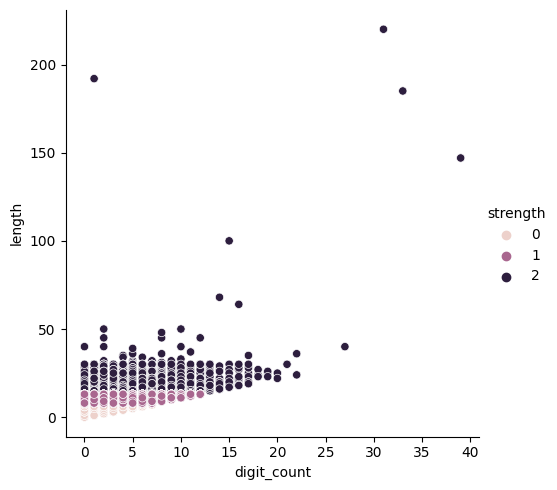

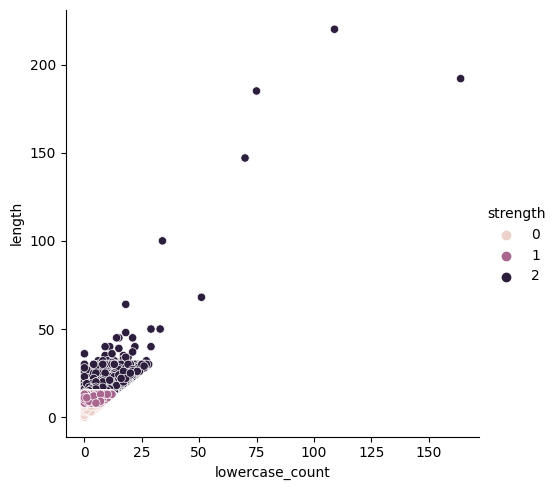

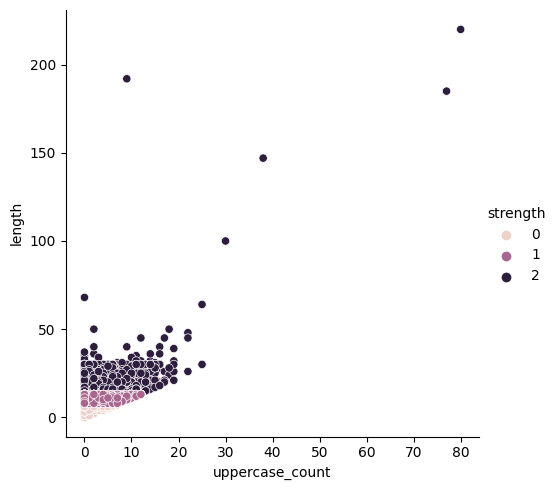

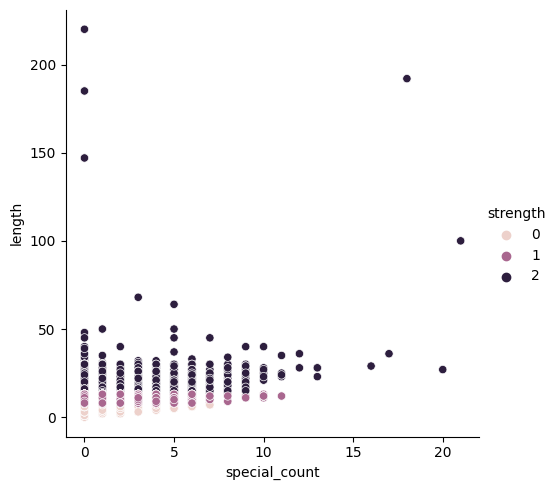

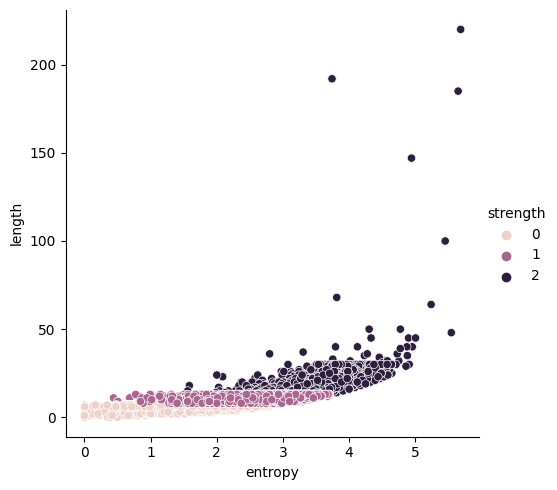

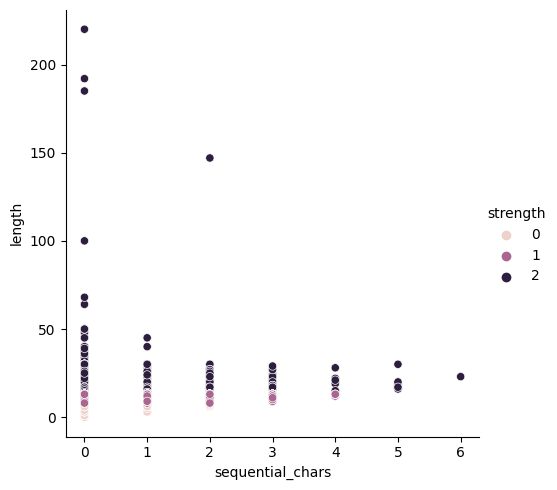

In [25]:
sns.relplot(x = df1.digit_count,y=df1.length,hue=df1.strength)
sns.relplot(x = df1.lowercase_count,y=df1.length,hue=df1.strength)
sns.relplot(x = df1.uppercase_count,y=df1.length,hue=df1.strength)
sns.relplot(x = df1.special_count,y=df1.length,hue=df1.strength)
sns.relplot(x = df1.entropy,y=df1.length,hue=df1.strength)
sns.relplot(x = df1.sequential_chars,y=df1.length,hue=df1.strength)

<Axes: >

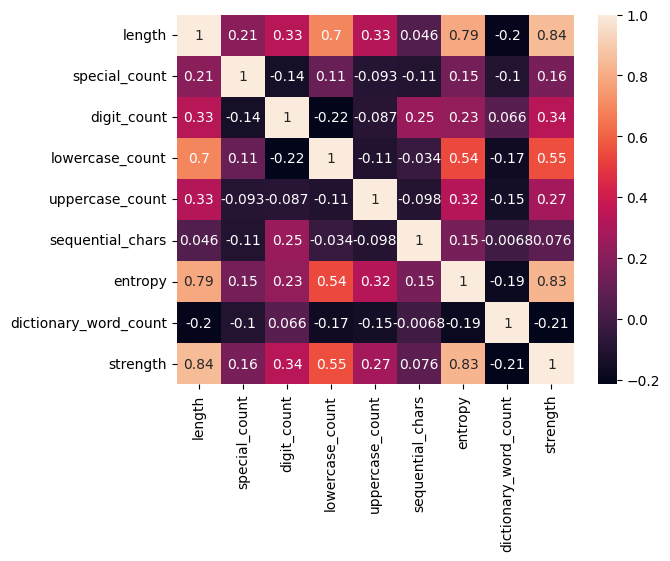

In [26]:
sns.heatmap(df1.corr() , annot = True)

* Strength has the highest positive correlation with entropy (0.743750) and length (0.684319), suggesting that longer passwords with higher entropy are typically stronger.

* Strength is moderately correlated with lowercase_count (0.453748) and uppercase_count (0.258735).

* Negative correlations with strength include dictionary_word_count (-0.335328) and sequential_chars (-0.150353), implying that passwords with more dictionary words and sequential characters tend to be weaker.

* Digit_count has a very low correlation with strength (0.015151), indicating that the number of digits alone does not strongly influence password strength.

In [27]:
# dependent and independent
X = df1.drop("strength" ,axis = True)
y = df1['strength']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.33,random_state = 10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25699, 8), (12659, 8), (25699,), (12659,))

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled.shape,X_train_scaled.shape

((12659, 8), (25699, 8))

/tmp/ipykernel_19/1085131144.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scaling')

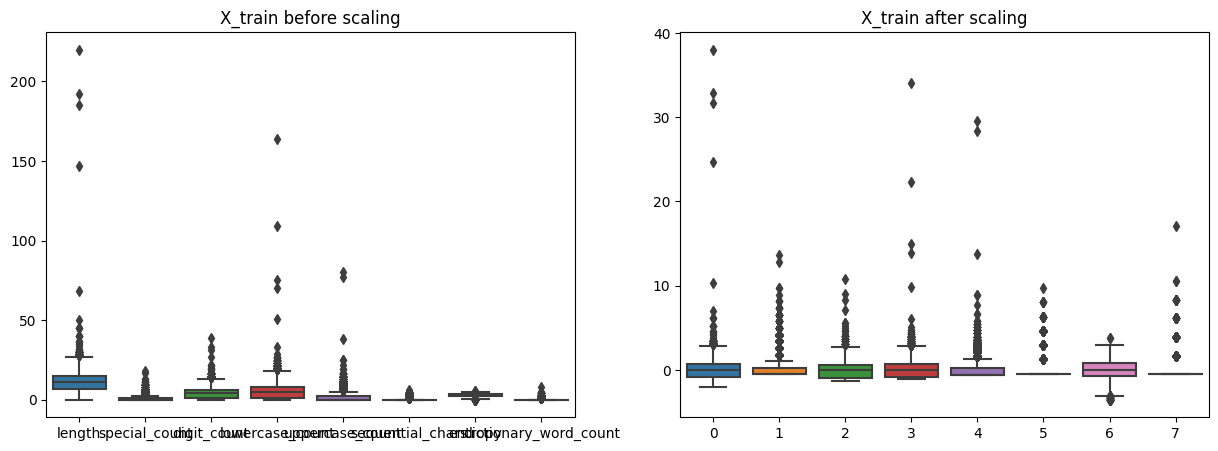

In [29]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train after scaling')

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [31]:
classifier.predict_proba(X_test_scaled)

array([[1.26876611e-17, 7.73060845e-03, 9.92269392e-01],
       [2.04180256e-21, 1.58107067e-04, 9.99841893e-01],
       [2.07755024e-03, 9.97922450e-01, 3.08928635e-12],
       ...,
       [3.70580123e-11, 9.99576565e-01, 4.23435016e-04],
       [8.01082686e-09, 9.99995299e-01, 4.69330735e-06],
       [2.33731563e-16, 6.74987804e-02, 9.32501220e-01]])

In [32]:
y_pred = classifier.predict(X_test_scaled)

In [33]:
y_pred.shape,y_test.shape

((12659,), (12659,))

In [34]:
from sklearn.metrics import confusion_matrix , accuracy_score,classification_report
print(confusion_matrix(y_pred , y_test ))
print(accuracy_score(y_pred , y_test ))
print(classification_report(y_pred , y_test ))

[[4177    1    0]
 [   0 4156    0]
 [   0    1 4324]]
0.9998420096374121
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4178
           1       1.00      1.00      1.00      4156
           2       1.00      1.00      1.00      4325

    accuracy                           1.00     12659
   macro avg       1.00      1.00      1.00     12659
weighted avg       1.00      1.00      1.00     12659



In [35]:
import warnings
warnings.filterwarnings("ignore")

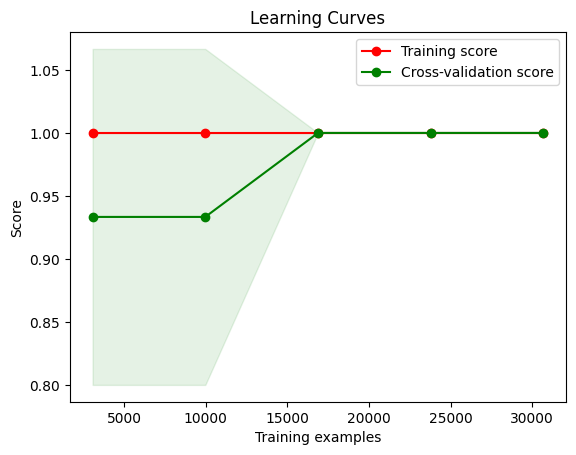

In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
classifier = LogisticRegression(max_iter=1000)
train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curves')
plt.show()